In [1]:
import tensorflow as tf
import os
print("Imported Libraries")

2023-01-24 10:13:19.417119: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-24 10:13:19.885458: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-24 10:13:19.885499: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-24 10:13:22.113704: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

Imported Libraries


In [2]:
#Avoid OOM error
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

2023-01-24 10:13:25.178947: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-24 10:13:25.179242: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-24 10:13:25.179286: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (atl-fa00269-8): /proc/driver/nvidia/version does not exist


### Remove Dodgy Images

In [3]:
import cv2
import imghdr
import matplotlib.pyplot as plt
print("Imported Libraries")

Imported Libraries


In [4]:
data_dir='data'
os.listdir(data_dir)

['sad', 'happy']

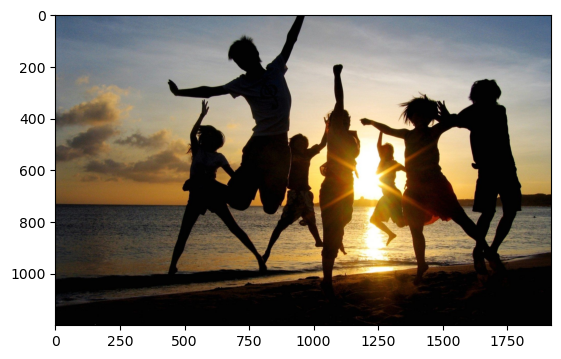

In [5]:
img=cv2.imread(os.path.join('data', 'happy', '1902544.jpg'))
img.shape
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
# plt.imshow(img)

In [6]:
image_exts=['jpeg', 'jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image{}'.format(image_path))

### Load Data

In [8]:
# tf.data.Dataset??

In [9]:
import numpy as np
import matplotlib.pyplot as plt
print("Imported Libraries")

Imported Libraries


In [10]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 156 files belonging to 2 classes.


2023-01-24 10:13:34.378967: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
data_iterator=data.as_numpy_iterator()

In [12]:
batch=data_iterator.next()

2023-01-24 10:13:35.068271: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 75202560 exceeds 10% of free system memory.
2023-01-24 10:13:35.334917: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 52469736 exceeds 10% of free system memory.
2023-01-24 10:13:35.470484: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 59101500 exceeds 10% of free system memory.
2023-01-24 10:13:35.756890: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 63078912 exceeds 10% of free system memory.
2023-01-24 10:13:36.532794: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 72000000 exceeds 10% of free system memory.


In [13]:
len(batch)

2

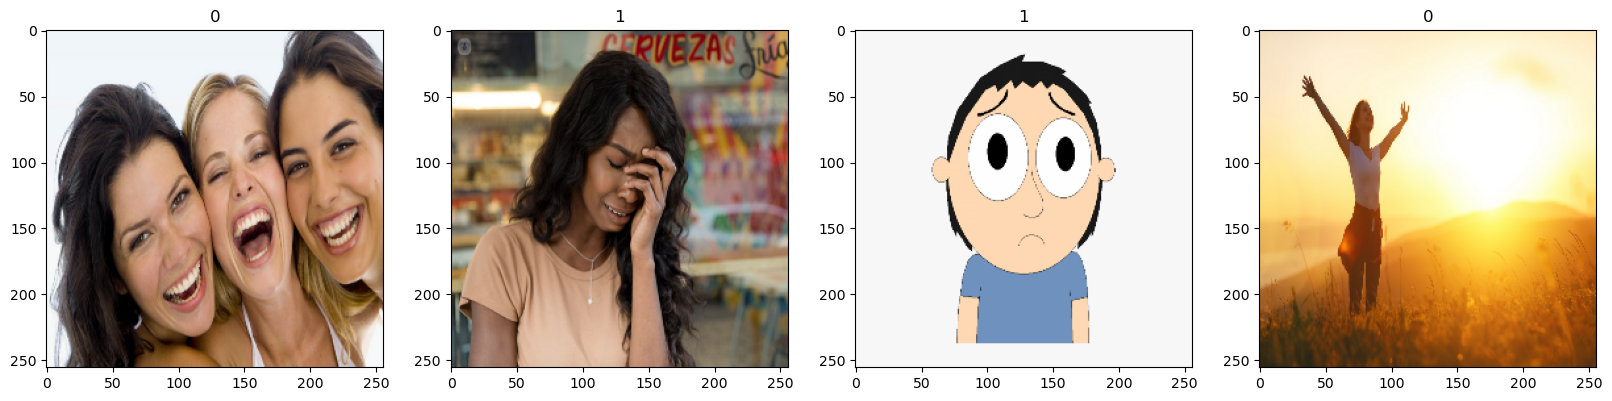

In [14]:
fig , ax=plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Preprocess Data

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


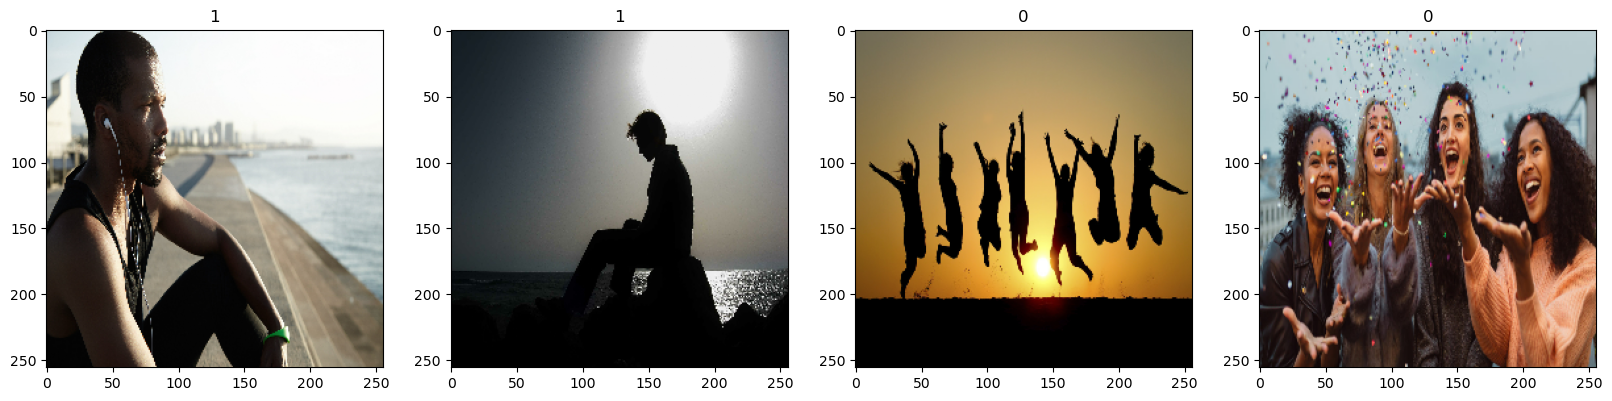

In [15]:
#Scale Data
data=data.map(lambda x, y: (x/255, y))
scaled_iterator = data.as_numpy_iterator()
batch=scaled_iterator.next()
batch[0].max()

fig , ax=plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [16]:
#Split Data
len(data) #5
train_size=int(len(data)*.7) #3
val_size=int(len(data)*.2) #1
test_size=int(len(data)*.1)+1 #1

In [17]:
train_size+val_size+test_size

5

In [18]:
train=data.take(train_size)
val=data.take(val_size)
test=data.take(test_size)

### Deep Learning Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
print("Imported Libraries")

Imported Libraries


In [20]:
model=Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256 ,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

### Training

In [24]:
logdir='logs'
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [25]:
hist=model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 10s 2s/step - loss: 0.8132 - accuracy: 0.5312 - val_loss: 0.6354 - val_accuracy: 0.5312
Epoch 2/20
3/3 [==============================] - 9s 3s/step - loss: 0.6183 - accuracy: 0.5833 - val_loss: 0.4953 - val_accuracy: 0.6562
Epoch 3/20
3/3 [==============================] - 7s 2s/step - loss: 0.5802 - accuracy: 0.6042 - val_loss: 0.5726 - val_accuracy: 0.7812
Epoch 4/20
3/3 [==============================] - 6s 2s/step - loss: 0.4965 - accuracy: 0.8229 - val_loss: 0.5120 - val_accuracy: 0.6250
Epoch 5/20
3/3 [==============================] - 6s 2s/step - loss: 0.4672 - accuracy: 0.7292 - val_loss: 0.4479 - val_accuracy: 0.8750
Epoch 6/20
3/3 [==============================] - 6s 2s/step - loss: 0.3881 - accuracy: 0.8646 - val_loss: 0.2643 - val_accuracy: 0.9375
Epoch 7/20
3/3 [==============================] - 6s 2s/step - loss: 0.2990 - accuracy: 0.9167 - val_loss: 0.3777 - val_accuracy: 0.7500
Epoch 8/20
3/3 [========================

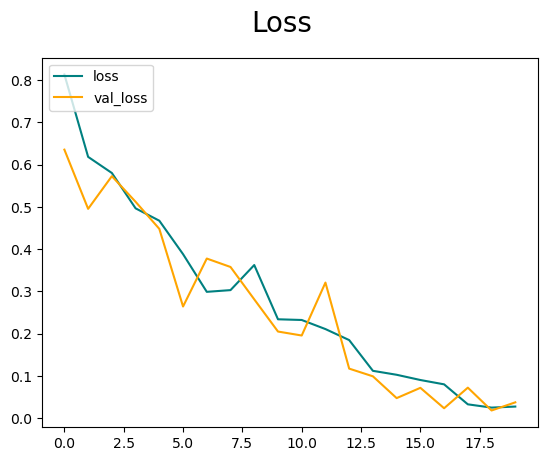

In [26]:
#Performance
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

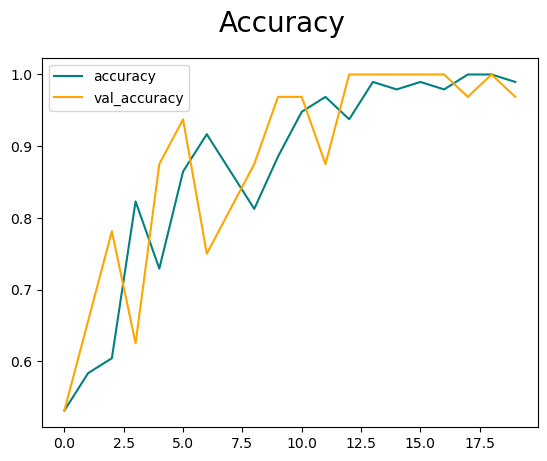

In [27]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Evaluation

In [28]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
print("Imported Libraries")

Imported Libraries


In [29]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [30]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 357ms/step


In [31]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


### Testing

In [32]:
import cv2
print("Imported Libraries")

Imported Libraries


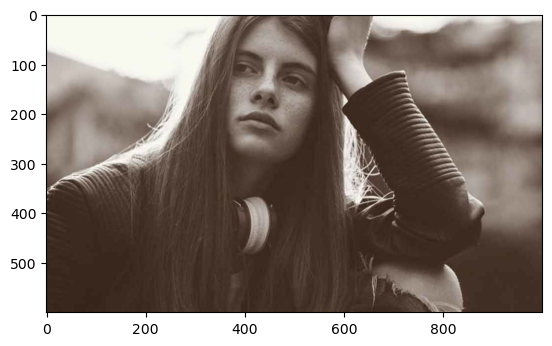

In [33]:
img = cv2.imread('sadtest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

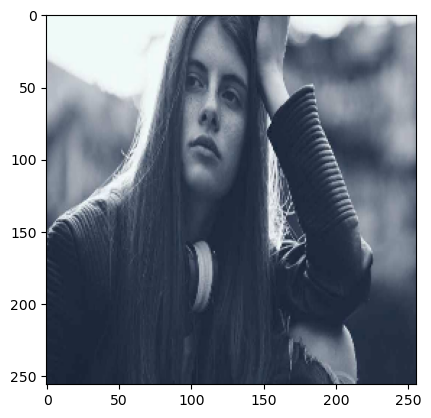

In [34]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [35]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [36]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 107ms/step


In [37]:
yhat

array([[0.9920325]], dtype=float32)

In [38]:
if yhat>0.5:
    print(f'Predicted class is SAD')
else:
    print(f'Predicted class is HAPPY')

Predicted class is SAD


### Save The Model

In [39]:
from tensorflow.keras.models import load_model
print("Imported Libraries")

Imported Libraries


In [40]:
model.save(os.path.join('models', 'happysadmodel.h5'))

In [42]:
new_model=load_model(os.path.join('models', 'happysadmodel.h5'))
new_model

In [43]:
yhatnew=new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 218ms/step


In [44]:
if yhatnew>0.5:
    print(f'Predicted class is SAD')
else:
    print(f'Predicted class is HAPPY')

Predicted class is SAD
